In [1]:
import os
import pandas as pd

In [12]:
SELECTED_CONTEXT_COLUMNS = ['query', 'context_score']  #, 'context_feedback']
SOURCE_DIR = os.path.join('data', 'temp')
topk3 = os.path.join(SOURCE_DIR, 'baseline_rag_result_R3_context_relevancy.csv')
topk8 = os.path.join(SOURCE_DIR, 'baseline_rag_result_context_relevancy.csv')

k3 = pd.read_csv(topk3)
k3 = k3[SELECTED_CONTEXT_COLUMNS]
k3['answer_by'] = 'topk=3'
k8 = pd.read_csv(topk8)
k8 = k8[SELECTED_CONTEXT_COLUMNS]
k8['answer_by'] = 'topk=8'
k8.head(3)

,query,context_score,answer_by
0,這門課希望學生從使用者變成什麼？,1.0,topk=8
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,1.0,topk=8
2,哪個軟體被用來合成講師的聲音？,1.0,topk=8


In [14]:
context_df = pd.concat([k3, k8], axis=0)
context_df

,query,context_score,answer_by
0,這門課希望學生從使用者變成什麼？,0.125,topk=3
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,0.000,topk=3
2,哪個軟體被用來合成講師的聲音？,0.000,topk=3
3,這門課的上課時間是週五下午幾點幾分開始？,1.000,topk=3
4,前兩個作業的截止日期延後到哪一天繳交？,0.125,topk=3
5,助教預計在幾月幾號把成績送出？,1.000,topk=3
6,課程中目前保留需要訓練多少時間的作業？,1.000,topk=3
7,如果你對生成式AI一無所知，建議先看哪一門課程？,0.125,topk=3
0,這門課希望學生從使用者變成什麼？,1.000,topk=8
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,1.000,topk=8


In [16]:
SELECTED_CONTEXT_COLUMNS = ['query', 'faithful_score']  #, 'context_feedback']
SOURCE_DIR = os.path.join('data', 'temp')
topk3 = os.path.join(SOURCE_DIR, 'baseline_rag_result_R3_retrieved_faithfulness.csv')
topk8 = os.path.join(SOURCE_DIR, 'baseline_rag_result_retrieved_faithfulness.csv')

k3 = pd.read_csv(topk3)
k3 = k3[SELECTED_CONTEXT_COLUMNS]
k3['answer_by'] = 'topk=3'
k8 = pd.read_csv(topk8)
k8 = k8[SELECTED_CONTEXT_COLUMNS]
k8['answer_by'] = 'topk=8'
k8.head(3)

,query,faithful_score,answer_by
0,這門課希望學生從使用者變成什麼？,1.0,topk=8
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,1.0,topk=8
2,哪個軟體被用來合成講師的聲音？,1.0,topk=8


In [17]:
faithful_df = pd.concat([k3, k8], axis=0)
faithful_df

,query,faithful_score,answer_by
0,這門課希望學生從使用者變成什麼？,0.0,topk=3
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,0.0,topk=3
2,哪個軟體被用來合成講師的聲音？,1.0,topk=3
3,這門課的上課時間是週五下午幾點幾分開始？,1.0,topk=3
4,前兩個作業的截止日期延後到哪一天繳交？,0.0,topk=3
5,助教預計在幾月幾號把成績送出？,1.0,topk=3
6,課程中目前保留需要訓練多少時間的作業？,1.0,topk=3
7,如果你對生成式AI一無所知，建議先看哪一門課程？,1.0,topk=3
0,這門課希望學生從使用者變成什麼？,1.0,topk=8
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,1.0,topk=8


In [19]:
df = pd.merge(context_df, faithful_df, how='left', on=['query', 'answer_by'])

In [20]:
import matplotlib.pyplot as plt

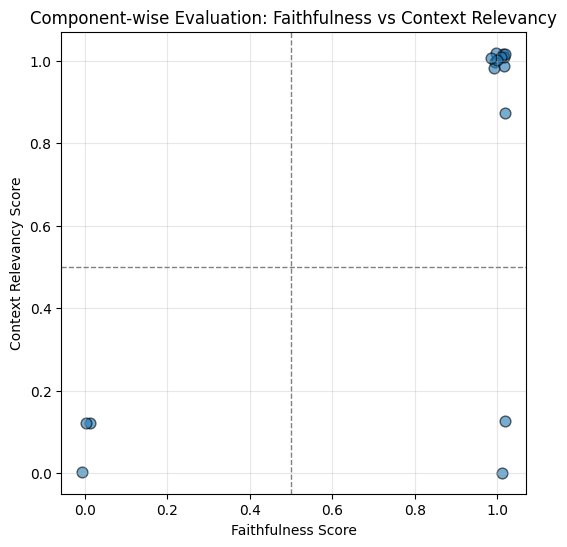

In [23]:
import numpy as np
import matplotlib.pyplot as plt

faithful_score = df['faithful_score'].to_numpy()
context_score = df['context_score'].to_numpy()

# 加上小擾動 (jitter)，避免點完全重疊
jitter_strength = 0.02  # 可以依需求調整
x = faithful_score + np.random.uniform(-jitter_strength, jitter_strength, size=len(faithful_score))
y = context_score + np.random.uniform(-jitter_strength, jitter_strength, size=len(context_score))

plt.figure(figsize=(6, 6))
plt.scatter(x, y, alpha=0.6, s=60, edgecolor='k')

# 畫 threshold 線 (例如 0.5)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
plt.axvline(0.5, color='gray', linestyle='--', linewidth=1)

plt.xlabel("Faithfulness Score")
plt.ylabel("Context Relevancy Score")
plt.title("Component-wise Evaluation: Faithfulness vs Context Relevancy")
plt.grid(alpha=0.3)
plt.show()


In [35]:
df['context_binary'] = (df['context_score'] > 0.5).astype(int)

In [42]:
df.groupby(['context_binary', 'faithful_score'])['answer_by'].agg(count='count', answerby=list)

count  \
context_binary faithful_score          
0              0.0                 3   
               1.0                 2   
1              1.0                11   

                                                                        answerby  
context_binary faithful_score                                                     
0              0.0                                      [topk=3, topk=3, topk=3]  
               1.0                                              [topk=3, topk=3]  
1              1.0             [topk=3, topk=3, topk=3, topk=8, topk=8, topk=...

In [46]:
grouped = (
    df.groupby(['context_binary', 'faithful_score'])['answer_by']
      .agg(lambda x: x.value_counts().to_dict())
      .reset_index(name='answerby_counts')
)

grouped

,context_binary,faithful_score,answerby_counts
0,0,0.0,{'topk=3': 3}
1,0,1.0,{'topk=3': 2}
2,1,1.0,"{'topk=8': 8, 'topk=3': 3}"


In [34]:
df

,query,context_score,answer_by,faithful_score,context_binary
0,這門課希望學生從使用者變成什麼？,0.125,topk=3,0.0,1
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,0.000,topk=3,0.0,1
2,哪個軟體被用來合成講師的聲音？,0.000,topk=3,1.0,1
3,這門課的上課時間是週五下午幾點幾分開始？,1.000,topk=3,1.0,0
4,前兩個作業的截止日期延後到哪一天繳交？,0.125,topk=3,0.0,1
5,助教預計在幾月幾號把成績送出？,1.000,topk=3,1.0,0
6,課程中目前保留需要訓練多少時間的作業？,1.000,topk=3,1.0,0
7,如果你對生成式AI一無所知，建議先看哪一門課程？,0.125,topk=3,1.0,1
8,這門課希望學生從使用者變成什麼？,1.000,topk=8,1.0,0
9,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,1.000,topk=8,1.0,0


In [48]:
SELECTED_CONTEXT_COLUMNS = ['query', 'correct_score']  #, 'context_feedback']
SOURCE_DIR = os.path.join('data', 'temp')
topk3 = os.path.join(SOURCE_DIR, 'baseline_rag_result_R3_correctness.csv')
topk8 = os.path.join(SOURCE_DIR, 'baseline_rag_result_correctness.csv')

k3 = pd.read_csv(topk3)
k3 = k3[SELECTED_CONTEXT_COLUMNS]
k3['answer_by'] = 'topk=3'
k8 = pd.read_csv(topk8)
k8 = k8[SELECTED_CONTEXT_COLUMNS]
k8['answer_by'] = 'topk=8'
k8.head(3)

,query,correct_score,answer_by
0,這門課希望學生從使用者變成什麼？,5.0,topk=8
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,5.0,topk=8
2,哪個軟體被用來合成講師的聲音？,5.0,topk=8


In [49]:
correct_df = pd.concat([k3, k8], axis=0)
correct_df

,query,correct_score,answer_by
0,這門課希望學生從使用者變成什麼？,4.0,topk=3
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,2.0,topk=3
2,哪個軟體被用來合成講師的聲音？,2.0,topk=3
3,這門課的上課時間是週五下午幾點幾分開始？,5.0,topk=3
4,前兩個作業的截止日期延後到哪一天繳交？,3.0,topk=3
5,助教預計在幾月幾號把成績送出？,5.0,topk=3
6,課程中目前保留需要訓練多少時間的作業？,1.0,topk=3
7,如果你對生成式AI一無所知，建議先看哪一門課程？,3.0,topk=3
0,這門課希望學生從使用者變成什麼？,5.0,topk=8
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,5.0,topk=8


In [51]:
df = pd.merge(df, correct_df, how='left', on=['query', 'answer_by'])

In [55]:
df['correct_binary'] = (df['correct_score'] > 4).astype(int)

In [56]:
df

,query,context_score,answer_by,faithful_score,context_binary,correct_score,correct_binary
0,這門課希望學生從使用者變成什麼？,0.125,topk=3,0.0,0,4.0,0
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,0.000,topk=3,0.0,0,2.0,0
2,哪個軟體被用來合成講師的聲音？,0.000,topk=3,1.0,0,2.0,0
3,這門課的上課時間是週五下午幾點幾分開始？,1.000,topk=3,1.0,1,5.0,1
4,前兩個作業的截止日期延後到哪一天繳交？,0.125,topk=3,0.0,0,3.0,0
5,助教預計在幾月幾號把成績送出？,1.000,topk=3,1.0,1,5.0,1
6,課程中目前保留需要訓練多少時間的作業？,1.000,topk=3,1.0,1,1.0,0
7,如果你對生成式AI一無所知，建議先看哪一門課程？,0.125,topk=3,1.0,0,3.0,0
8,這門課希望學生從使用者變成什麼？,1.000,topk=8,1.0,1,5.0,1
9,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,1.000,topk=8,1.0,1,5.0,1


In [57]:
subdf = df[df['context_binary']==1]
subdf = subdf[subdf['faithful_score']==1]
subdf

,query,context_score,answer_by,faithful_score,context_binary,correct_score,correct_binary
3,這門課的上課時間是週五下午幾點幾分開始？,1.000,topk=3,1.0,1,5.0,1
5,助教預計在幾月幾號把成績送出？,1.000,topk=3,1.0,1,5.0,1
6,課程中目前保留需要訓練多少時間的作業？,1.000,topk=3,1.0,1,1.0,0
8,這門課希望學生從使用者變成什麼？,1.000,topk=8,1.0,1,5.0,1
9,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,1.000,topk=8,1.0,1,5.0,1
10,哪個軟體被用來合成講師的聲音？,1.000,topk=8,1.0,1,5.0,1
11,這門課的上課時間是週五下午幾點幾分開始？,1.000,topk=8,1.0,1,5.0,1
12,前兩個作業的截止日期延後到哪一天繳交？,1.000,topk=8,1.0,1,5.0,1
13,助教預計在幾月幾號把成績送出？,1.000,topk=8,1.0,1,5.0,1
14,課程中目前保留需要訓練多少時間的作業？,0.875,topk=8,1.0,1,5.0,1


In [58]:
subdf.groupby(['correct_binary']).count()

,query,context_score,answer_by,faithful_score,context_binary,correct_score
correct_binary,,,,,,
0,1,1,1,1,1,1
1,10,10,10,10,10,10


In [60]:
from collections import Counter

subgrouped = (
    subdf.groupby('correct_binary')['answer_by']
          .agg(lambda x: dict(Counter(x)))  # 類似上面 value_counts 的效果
          .reset_index(name='answerby_counts')
)

subgrouped

,correct_binary,answerby_counts
0,0,{'topk=3': 1}
1,1,"{'topk=3': 2, 'topk=8': 8}"


In [61]:
df

,query,context_score,answer_by,faithful_score,context_binary,correct_score,correct_binary
0,這門課希望學生從使用者變成什麼？,0.125,topk=3,0.0,0,4.0,0
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,0.000,topk=3,0.0,0,2.0,0
2,哪個軟體被用來合成講師的聲音？,0.000,topk=3,1.0,0,2.0,0
3,這門課的上課時間是週五下午幾點幾分開始？,1.000,topk=3,1.0,1,5.0,1
4,前兩個作業的截止日期延後到哪一天繳交？,0.125,topk=3,0.0,0,3.0,0
5,助教預計在幾月幾號把成績送出？,1.000,topk=3,1.0,1,5.0,1
6,課程中目前保留需要訓練多少時間的作業？,1.000,topk=3,1.0,1,1.0,0
7,如果你對生成式AI一無所知，建議先看哪一門課程？,0.125,topk=3,1.0,0,3.0,0
8,這門課希望學生從使用者變成什麼？,1.000,topk=8,1.0,1,5.0,1
9,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,1.000,topk=8,1.0,1,5.0,1


In [63]:
df['proxy'] = df[['context_binary', 'faithful_score']].min(axis=1)

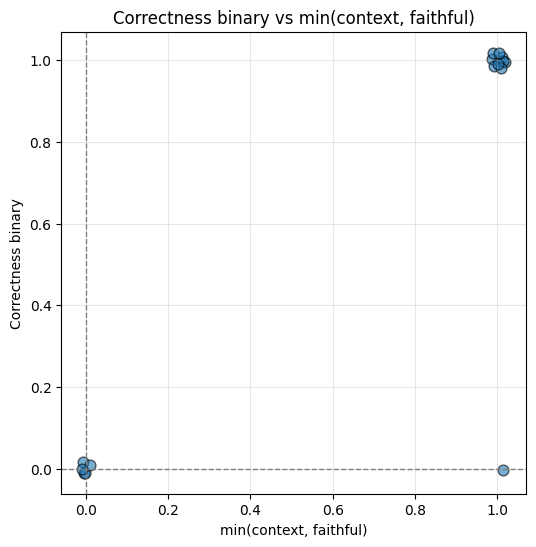

In [66]:
import numpy as np
import matplotlib.pyplot as plt

proxy_score = df['proxy'].to_numpy()
correct_score = df['correct_binary'].to_numpy()

# 加上小擾動 (jitter)，避免點完全重疊
jitter_strength = 0.02  # 可以依需求調整
x = proxy_score + np.random.uniform(-jitter_strength, jitter_strength, size=len(proxy_score))
y = correct_score + np.random.uniform(-jitter_strength, jitter_strength, size=len(correct_score))

plt.figure(figsize=(6, 6))
plt.scatter(x, y, alpha=0.6, s=60, edgecolor='k')

# 畫 threshold 線 (例如 0.5)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

plt.xlabel("min(context, faithful)")
plt.ylabel("Correctness binary")
plt.title("Correctness binary vs min(context, faithful)")
plt.grid(alpha=0.3)
plt.show()